# CONECTAR DRIVE CON GOOGLE COLAB




En este cuaderno se muestra como es posible conectar Google Colab con kernel de R con Google Drive. Esta funcionalidad es muy útil para utilizar con rápidez grandes archivos de datos. Para conectar drive con google colab, utilizaremos el la librería *googledrive* de R.

In [ ]:
install.packages("googledrive")
library("googledrive")
library("googlesheets4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




Para documentación sobre la libreria 'googledrive', utilizar la siguiente línea de código.

In [ ]:
help(googledrive)

Instalamos las librerias necesarias y configuramos el cuaderno para el correcto funcionamiento de la librería 'googledrive'.

In [ ]:
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




A continuación, verificamos las credenciales de nuestra cuenta de Drive.

In [ ]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g5-0I67tjbNi5fWozuzil-eO7DZXyzNvWbeAAQRHhyi2qoIvJLfgQ4


Una vez que estamos conectados a nuestro drive, es posible ver los archivos usando la función *drive_ls*. 

In [ ]:
drive_ls()

Esta función permite ver los archivos dentro de cualquier directorio. Solo es necesario inserir el nombre del directorio que se quiere inspeccionar.

In [ ]:
drive_ls('fraud_data')

name            id                               
1 test_fraud.csv  1KTj3Kv5Puxk180IAb_zR7PTeCwkjKmVy
2 train_fraud.csv 15FWswumis8A22CbxS-UG6nOrhwDUKmRv
  drive_resource                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Para utilizar un archivo de nuestro drive, primero lo descargamos como se muestra a continuación. Para ello debemos indicar la ubicación exacta del archivo que queremos usar.

In [ ]:
drive_download("fraud_data/train_fraud.csv",overwrite = TRUE)

File downloaded:
  * train_fraud.csv
Saved locally as:
  * train_fraud.csv



Una vez descargado, ya lo podemos usar normalmente.

In [ ]:
read.csv("train_fraud.csv")

X,ID_TARJETA,VL_AUTORIZACION,FC_AUTORIZACION,BIN,DW_TIPO_OPERACION,RED_ADQUIRENTE,EMISOR,RESPUESTA,AUTORIZADOR,⋯,NO_TXN_SAME_PAIS_1D,AVG_AMOUNT_SAME_PAIS_1D,NO_TXN_SAME_MCC_1D,AVG_AMOUNT_SAME_MCC_1D,NO_TXN_1H,NO_TXN_SAME_PAIS_1H,AVG_AMOUNT_SAME_PAIS_1H,NO_TXN_SAME_MCC_1H,AVG_AMOUNT_SAME_MCC_1H,FRAUDE
<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,491511XXXXXX8475,17000,2010-11-23 17:29:55,-8.541363,-3.692157,-3.873381,-4.015410,-3.721696,-4.051667,⋯,3,22666.67,1,30000.00,0,0,0,0,0,0
2,426288XXXXXX0019,32000,2010-11-26 11:51:29,-5.171858,-3.692157,-4.169345,-4.167374,-3.721696,-4.182465,⋯,15,91496.47,3,83366.67,2,2,56861,1,89000,0
3,454600XXXXXX4004,30000,2010-10-08 20:44:30,-2.262847,-3.692157,-3.873381,-2.605739,-3.721696,-2.582147,⋯,1,20000.00,1,20000.00,1,1,20000,1,20000,0
4,491268XXXXXX0696,400000,2010-12-16 07:43:23,-9.370757,-3.864807,-3.771418,-4.490753,-3.700459,-4.538651,⋯,1,37000.00,0,0.00,0,0,0,0,0,0
5,498862XXXXXX1091,89430,2011-01-08 12:22:56,-2.905438,-3.692157,-3.873381,-4.167374,-3.721696,-4.182465,⋯,2,243083.50,1,359167.00,0,0,0,0,0,0
6,491511XXXXXX1319,2546000,2010-11-22 16:28:44,-8.541363,-3.692157,-3.873381,-4.015410,-3.721696,-4.051667,⋯,2,62116.00,0,0.00,1,1,84232,0,0,0
7,459918XXXXXX0972,137500,2010-12-07 13:38:06,-2.279267,-3.692157,-4.169345,-4.015410,-3.721696,-4.051667,⋯,0,0.00,0,0.00,0,0,0,0,0,0
8,454616XXXXXX2127,38900,2010-12-15 08:15:44,-4.787511,-3.692157,-4.169345,-3.996104,-3.721696,-5.016259,⋯,1,142840.00,0,0.00,0,0,0,0,0,0
9,456815XXXXXX9590,175400,2010-11-22 11:37:51,-2.268066,-3.692157,-4.169345,-3.105834,-3.721696,-3.129162,⋯,1,180800.00,0,0.00,0,0,0,0,0,0


## EXTRA: Como salvar archivos en el drive desde google colab

En esta sección mostramos como guardar un archivo desde google colab en el drive. En concreto, mostraremos como guardar un modelo de red neuronal que hayamos implementado. 

Primero instalamos y llamamos todas las librerias necesarias para nuestro ejemplo.

In [ ]:
install.packages('tictoc')
library(tictoc)
tic()
install.packages('keras')
install.packages('tfdatasets')
install.packages('tfautograph')
install.packages('reticulate')
toc()
library(keras)
library(tfdatasets)
library(tfautograph)
library(reticulate)
library(purrr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



86.487 sec elapsed



Attaching package: ‘keras’


The following object is masked from ‘package:R.utils’:

    evaluate


The following object is masked from ‘package:R.oo’:

    compile




Preparamos los datos necesarios para el modelo.

In [ ]:
img_rows <- 28
img_cols <- 28

mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

x_train <- x_train / 255
x_test <- x_test / 255

cat('x_train_shape:', dim(x_train), '\n')
cat(nrow(x_train), 'train samples\n')
cat(nrow(x_test), 'test samples\n')

num_classes <- 10
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)



x_train_shape: 60000 28 28 1 
60000 train samples
10000 test samples


Implementamos y compilamos el modelo a continuación.

In [ ]:
# help("layer_conv_2d")
# help("layer_max_pooling_2d")
# help("layer_flatten")
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = input_shape) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = num_classes, activation = 'softmax')


model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)


Entrenamos el modelo con 12 épocas.

`geom_smooth()` using formula 'y ~ x'



loss   accuracy 
0.03403406 0.99140000

57.566 sec elapsed


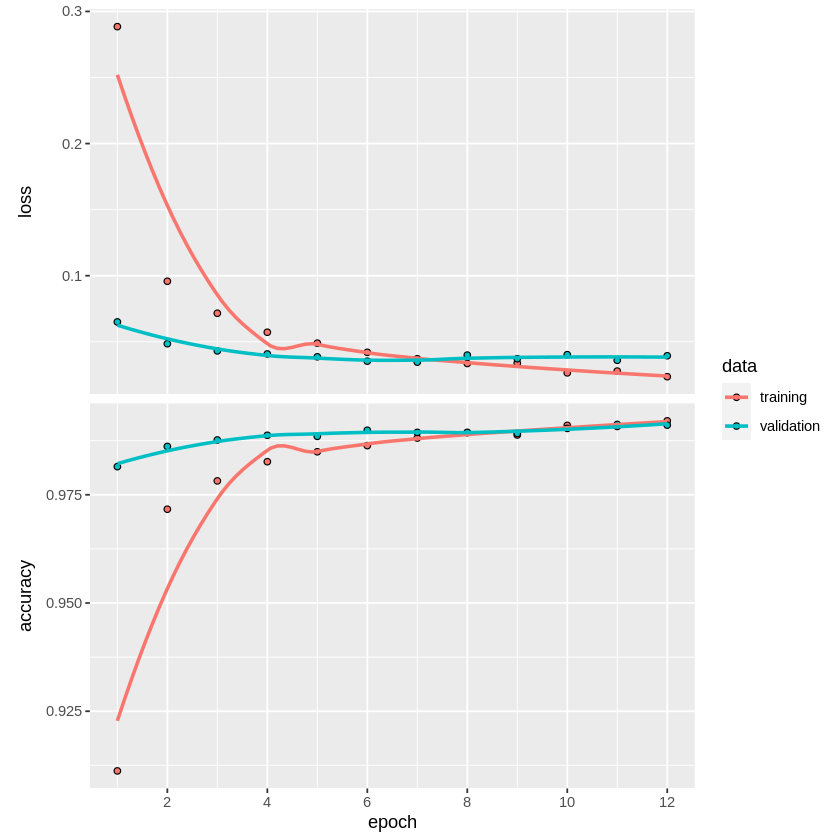

In [ ]:
tic()
batch_size <- 128
epochs <- 12
history<-model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2,
  verbose=2)

plot(history)

model %>% evaluate(x_test, y_test,verbose = 2)
toc()

Guardamos el modelo en un archivo .hdf5 y probamos a cargarlo en una nueva variable.

In [ ]:
save_model_hdf5(model, filepath = "mnist_weights.hdf5", overwrite = TRUE,
  include_optimizer = TRUE)

new_model = load_model_hdf5("mnist_weights.hdf5", custom_objects = list(loss_categorical_crossentropy=loss_categorical_crossentropy), compile = TRUE)

new_model %>% predict_classes(x_test)

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1
  [109] 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 3 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1
  [253] 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 8 7 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 6 6 4 9 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 8 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 7 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 8 2 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 1 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 4 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 2 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 3 8 3 3 6 7 2 8 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 4 4 8 5 5 4 0 8 2 1 0 8 4
  [721] 5 0 4 0 6 1 7 3 2 6 7 2 6 9 3 1 4 6 2 5 4 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 9 3 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 1 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 2 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 3 2 6 7 6 6 3 2 7 8 1 1 7 5 6 4 9 5 1 3 3 4 7 8 9 1 1 6 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 5 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 3 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 8 5 9 7 9 6 9 6 3 7 4 4 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 7 4 4 4 4 6 6 4 7 9 3 4 5 5 8 7 3 7 2 7 0 2 4 1 1 6 6 9 2 8 7 2
 [1189] 0 1 5 0 9 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 4 8 2 2 9 8 4 0 4 5 8 5 1 2 1 3 1 7 4 5 7 2 0 9 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 1 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 5 3 3 6 6 0 1
 [1297] 6 0 3 3 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 0 8 7 9 4 8 8 7 9 7 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 2 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 5 0 9 2 4 3 3 9 7 6 6 8 0 4 1 3 8 2 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 7 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 7 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 7 8 8 5 0 1 1 4 7 3 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 4 5 2 4 9 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 2 0 3 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 2 4 4 7 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 5 7 2 0 0 9 1 7 8 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 4 5 1 7 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 6 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 2 1 7 9 0 2 0 3 3 7
 [18

Guardamos el archivo del modelo en drive. 

In [ ]:
drive_upload('mnist_weights.hdf5')

Local file:
  * mnist_weights.hdf5
uploaded into Drive file:
  * mnist_weights.hdf5: 11SPSA5Tdez1uDDvIDrnbKTy4vKhYNfm0
with MIME type:
  * application/octet-stream



IMPORTANTE: Guardar archivos que se vayan a reutilizar en drive o descargarlos en local. Una vez que Google colab se desactive, se eliminarán todos los archivos en la máquina virtual.